In [3]:
import numpy as np

In [4]:
import pandas as pd

df = pd.read_csv(r"C:\Users\HP\OneDrive\Downloads\archive\spam.csv", encoding="latin1")



In [5]:
print(df)

        v1                                                 v2 Unnamed: 2  \
0      ham  Go until jurong point, crazy.. Available only ...        NaN   
1      ham                      Ok lar... Joking wif u oni...        NaN   
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3      ham  U dun say so early hor... U c already then say...        NaN   
4      ham  Nah I don't think he goes to usf, he lives aro...        NaN   
...    ...                                                ...        ...   
5567  spam  This is the 2nd time we have tried 2 contact u...        NaN   
5568   ham              Will Ì_ b going to esplanade fr home?        NaN   
5569   ham  Pity, * was in mood for that. So...any other s...        NaN   
5570   ham  The guy did some bitching but I acted like i'd...        NaN   
5571   ham                         Rofl. Its true to its name        NaN   

     Unnamed: 3 Unnamed: 4  
0           NaN        NaN  
1           NaN        NaN  


In [6]:
df.shape

(5572, 5)

In [7]:
# clean data
# EDA analysis
# text preprocessing (vectoriation )
# model building 
# evaluation
# imporovement
# website
# display


## 1. Data cleaning

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [9]:
## drop cols

df.drop(columns=['Unnamed: 2', 'Unnamed: 3','Unnamed: 4'], inplace=True)

In [10]:
df.sample(5)

,v1,v2
254,ham,"I'm back, lemme know when you're ready"
329,ham,I'm reading the text i just sent you. Its mean...
5212,ham,K.k.how is your business now?
2384,ham,"Sorry, I'll call later"
1092,ham,Where r we meeting?


In [11]:
# renamed cols
df.rename(columns={'v1':'spam/ham', 'v2':'Text'},inplace=True)
df.sample(5)

,spam/ham,Text
5043,ham,"Dunno, my dad said he coming home 2 bring us o..."
5016,spam,Dear 0776xxxxxxx U've been invited to XCHAT. T...
3770,ham,"Hi, wlcome back, did wonder if you got eaten b..."
1993,ham,Eh den sat u book e kb liao huh...
3109,spam,Good Luck! Draw takes place 28th Feb 06. Good ...


In [12]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder() # value

In [13]:
df['spam/ham']= encoder.fit_transform(df['spam/ham'])

In [14]:
df.head()

,spam/ham,Text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [15]:
# missing values
df.isnull().sum()

spam/ham    0
Text        0
dtype: int64

In [16]:
df.duplicated().sum()

403

In [17]:
df = df.drop_duplicates(keep='first')

In [18]:
df.duplicated().sum()

0

In [19]:
df.shape

(5169, 2)

## EDA (Exploratory Data Analysis)

In [20]:
df.head()

,spam/ham,Text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [21]:
df['spam/ham'].value_counts()

spam/ham
0    4516
1     653
Name: count, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

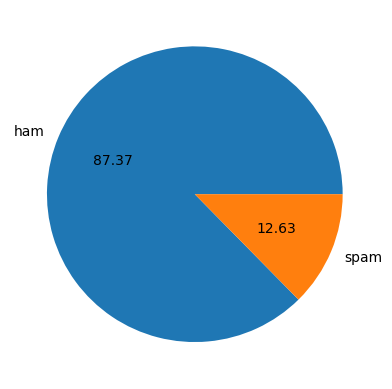

In [22]:
import matplotlib.pyplot as plt
plt.pie(df['spam/ham']. value_counts(), labels=['ham', 'spam'], autopct="%0.2f")
plt.show

In [23]:
#data is imbalanced

In [24]:
import nltk #natural language tool kit

In [25]:
!pip install nltk

In [26]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [27]:
df['num_characters']=df['Text'].apply(len)

In [28]:
df.head()

,spam/ham,Text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [29]:
df['New_words']=df['Text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [30]:
 df.head()

,spam/ham,Text,num_characters,New_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [31]:
 df['New_sentences']= df['Text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [32]:
df.head()

,spam/ham,Text,num_characters,New_words,New_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [33]:
df[['num_characters', 'New_words','New_sentences']].describe()

,num_characters,New_words,New_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [34]:
#ham
df[df['spam/ham']== 0][['num_characters', 'New_words','New_sentences']].describe()

,num_characters,New_words,New_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [35]:
#spam
df[df['spam/ham']==1][['num_characters', 'New_words','New_sentences']].describe()

,num_characters,New_words,New_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [36]:
import seaborn as sns #histogram
#same up

<Axes: xlabel='num_characters', ylabel='Count'>

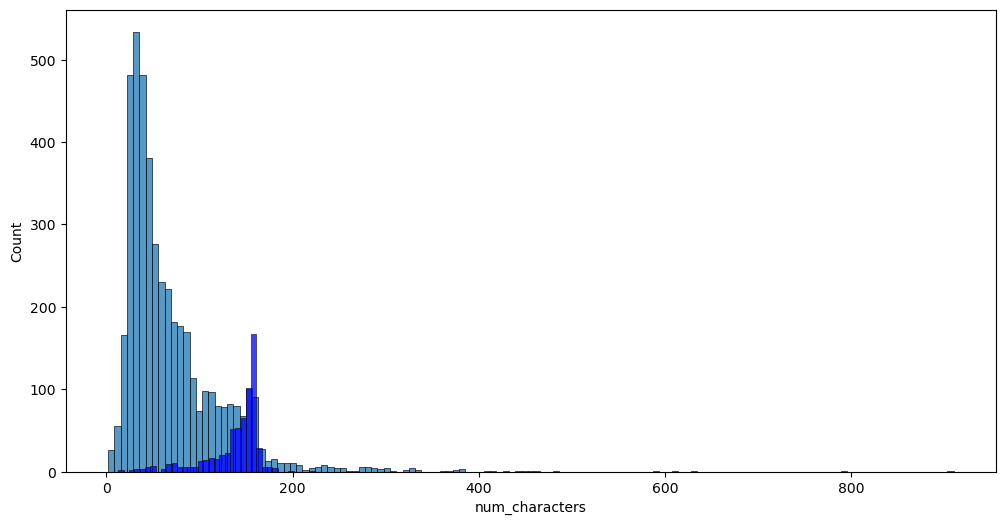

In [37]:

plt.figure(figsize=(12,6))
sns.histplot(df[df['spam/ham']==0]['num_characters']) # ham messages num of carecter is used less here
sns.histplot(df[df['spam/ham']==1]['num_characters'], color='Blue') # spam messages is big

<Axes: xlabel='New_words', ylabel='Count'>

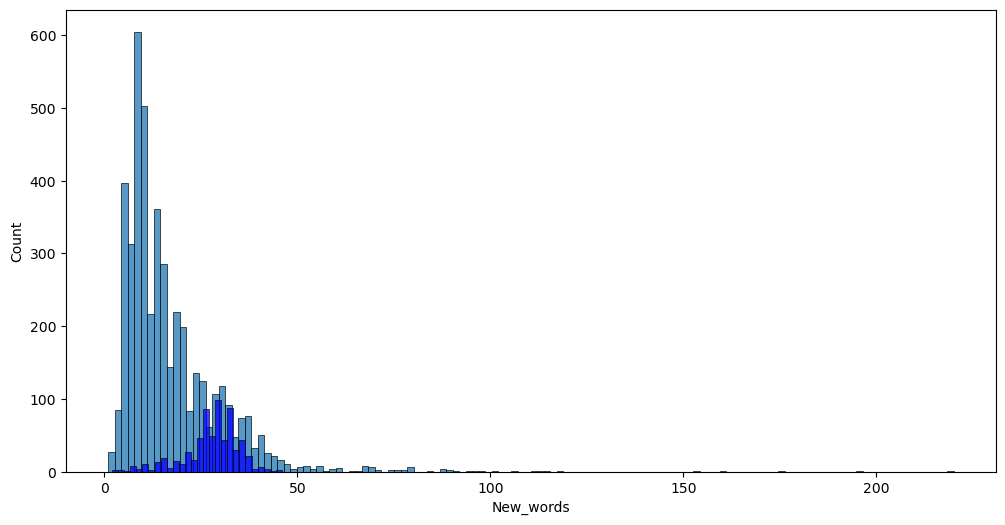

In [38]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['spam/ham']==0]['New_words']) # ham messages num of word is used less here
sns.histplot(df[df['spam/ham']==1]['New_words'], color='Blue') # more spam words

C:\Users\HP\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


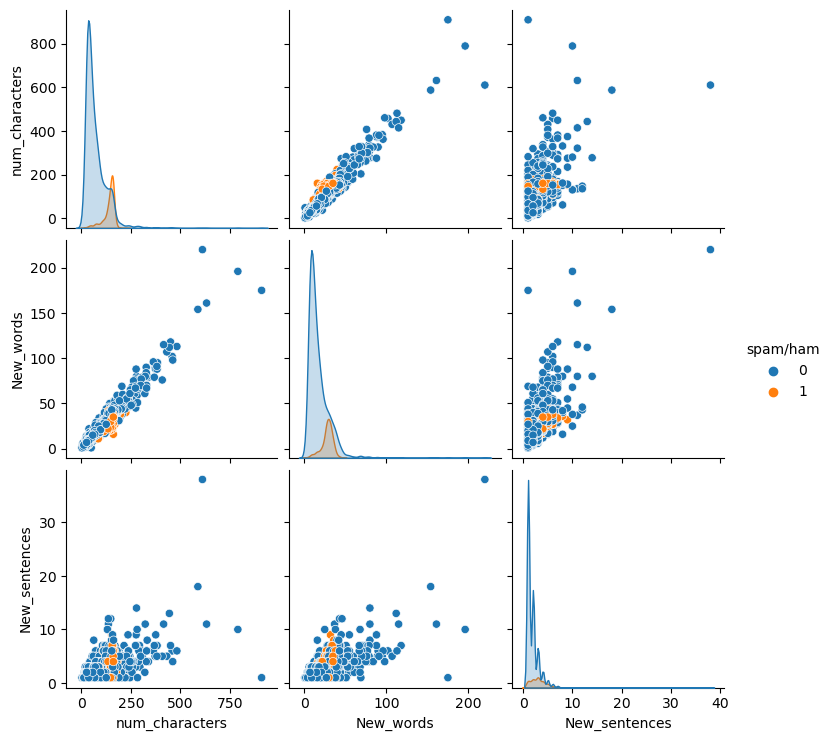

In [39]:
sns.pairplot(df,hue='spam/ham') # relation ship between no of word with character 

In [40]:
## character increase then the sentences also get increase
# outliers in data

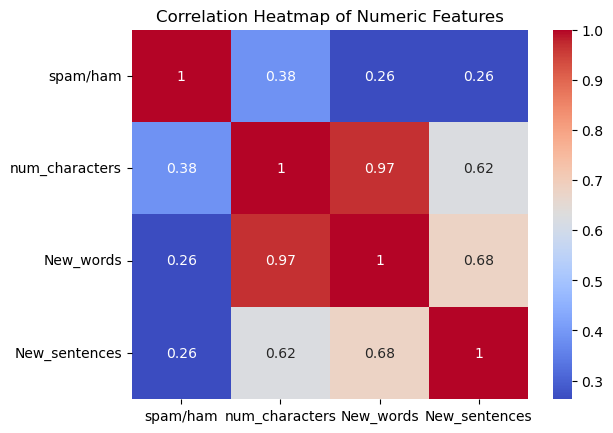

In [41]:
# Check if any numeric columns exist
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns
numeric_df = df.select_dtypes(include=['number'])

# Create heatmap
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap of Numeric Features")
plt.show()


# Data preprocessing
lower case,
Tokeniation,
Removing special character,
Removing stop words and punctuation,
Stemming

In [142]:
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import string

ps = PorterStemmer()

def transform_text(text):

    text = text.lower()
    

    text = nltk.word_tokenize(text)
    
    y = []
    

    for i in text:
        if i.isalnum():
            y.append(i)
    

    text = y[:]
    y.clear()
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
 
    text = y[:]
    y.clear()
    for i in text:
        y.append(ps.stem(i))
    
 
    return " ".join(y)


In [143]:
transform_text("Hi! How are you, Om?")


'hi om'

In [144]:
df['Text'][2000]

"But i'll b going 2 sch on mon. My sis need 2 take smth."

In [145]:
from nltk.stem.porter import PorterStemmer

ps = PorterStemmer()
print(ps.stem('dancing'))


danc


In [146]:
df['transformed_text']=df['Text'].apply(transform_text)

In [147]:
df.head()

,spam/ham,Text,num_characters,New_words,New_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [148]:
from wordcloud import WordCloud
wc = WordCloud(width=500, height=500, min_font_size=10, background_color='white')


In [149]:

df['transformed_text'] = df['Text'].apply(transform_text)

wc = WordCloud(width=500, height=500, min_font_size=10, background_color='white')
spam_wc = wc.generate(df[df['spam/ham'] == 1]['transformed_text'].str.cat(sep=" "))

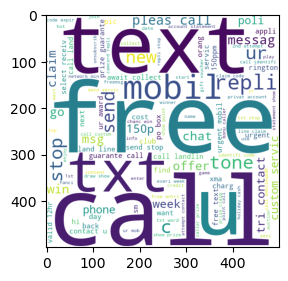

In [150]:
plt.figure(figsize=(3,6))
plt.imshow(spam_wc)

In [151]:
# Generate WordCloud for ham messages
ham_wc = wc.generate(df[df['spam/ham'] == 0]['transformed_text'].str.cat(sep=" "))

# Display the ham WordCloud
import matplotlib.pyplot as pl


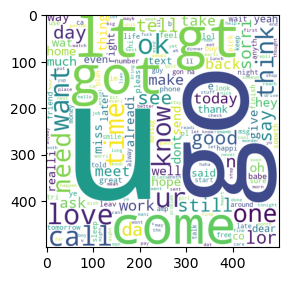

In [152]:
plt.figure(figsize=(3,6))
plt.imshow(ham_wc)

In [153]:
df.head()

,spam/ham,Text,num_characters,New_words,New_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [154]:
spam_corpus = []

for msg in df[df['spam/ham'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)


print(spam_corpus[:20])


['free', 'entri', '2', 'wkli', 'comp', 'win', 'fa', 'cup', 'final', 'tkt', '21st', 'may', 'text', 'fa', '87121', 'receiv', 'entri', 'question', 'std', 'txt']


In [155]:
len(spam_corpus)

9939

In [ ]:
ham_corpus = []

for msg in df[df['spam/ham'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)


print(ham_corpus[:20])

In [ ]:
len(ham_corpus)

In [ ]:
top_ham_words = Counter(ham_corpus).most_common(30)

# Convert to DataFrame
df_top_ham = pd.DataFrame(top_ham_words, columns=['word', 'count'])

# Plot horizontal barplot
plt.figure(figsize=(12,6))
sns.barplot(x='count', y='word', data=df_top_ham)
plt.title("Top 30 Most Common Words in Ham Messages")
plt.xlabel("Count")
plt.ylabel("Word")
plt.show()

In [ ]:
df.head()

# Model Building

In [ ]:
# convert text to vector

# Example transform_text function (you may already have this)
def transform_text(text):
    # lowercase + remove special characters (example)
    text = text.lower()
    text = ''.join(char for char in text if char.isalnum() or char.isspace())
    return text

df['transformed_text'] = df['Text'].apply(transform_text)



In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features=3000)
X = tfidf.fit_transform(df['transformed_text']).toarray()  # now it works
y = df['spam/ham']


In [ ]:
print(X.shape)



In [ ]:
y = df['spam/ham'].values

In [ ]:
y

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# y = target variable: 1 = spam, 0 = ham
y = df['spam/ham']


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=3000)  # you can adjust max_features
X = vectorizer.fit_transform(df['transformed_text'])


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)


In [ ]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB, BernoulliNB


In [ ]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [ ]:
X_train_dense = X_train.toarray()
X_test_dense = X_test.toarray()


In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

# Now you can use them
gnb.fit(X_train_dense, y_train)
y_pred1 = gnb.predict(X_test_dense)

print("Accuracy:", accuracy_score(y_test, y_pred1))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred1))
print("Precision:", precision_score(y_test, y_pred1))



In [ ]:
mnb.fit(X_train_dense, y_train)
y_pred2 = mnb.predict(X_test_dense)

print("Accuracy:", accuracy_score(y_test, y_pred2))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred2))
print("Precision:", precision_score(y_test, y_pred2))

In [ ]:
bnb.fit(X_train_dense, y_train)
y_pred3 = bnb.predict(X_test_dense)

print("Accuracy:", accuracy_score(y_test, y_pred3))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred3))
print("Precision:", precision_score(y_test, y_pred3))

In [ ]:
# tfidf MNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [ ]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
Irc = LogisticRegression(solver='liblinear', penalty='11')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [ ]:
clfs = {
    "Logistic Regression": LogisticRegression(penalty='l2', solver='liblinear', max_iter=1000, random_state=42),
    "SVC": SVC(),
    "MultinomialNB": MultinomialNB(),
    "Decision Tree": DecisionTreeClassifier(),
    "KNN": KNeighborsClassifier(),
    "Random Forest": RandomForestClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "Bagging": BaggingClassifier(),
    "Extra Trees": ExtraTreesClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
}


In [ ]:
def train_classifier(clf,X_train,y_train,X_test,y_test): 
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy, precision

In [ ]:
train_classifier(svc, X_train,y_train,X_test,y_test)

In [ ]:
accuracy_scores = []
precision_scores = []

for name, clf in clfs.items():
    current_accuracy, current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)


In [120]:
min_len = min(len(clfs.keys()), len(accuracy_scores), len(precision_scores))

performance_df = pd.DataFrame({
    'Algorithm': list(clfs.keys())[:min_len],
    'Accuracy': accuracy_scores[:min_len],
    'Precision': precision_scores[:min_len]
})


In [121]:
performance_df

,Algorithm,Accuracy,Precision
0,Logistic Regression,0.970019,0.990826
1,SVC,0.975822,1.000000
2,MultinomialNB,0.970019,1.000000
3,Decision Tree,0.948743,0.824427
4,KNN,0.907157,1.000000
5,Random Forest,0.975822,1.000000
6,AdaBoost,0.969052,0.956897
7,Bagging,0.962282,0.938053
8,Extra Trees,0.976789,0.983051
9,Gradient Boosting,0.958414,0.935780


In [122]:
#improve the model

In [123]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")

In [124]:
performance_df1

,Algorithm,variable,value
0,Logistic Regression,Accuracy,0.970019
1,SVC,Accuracy,0.975822
2,MultinomialNB,Accuracy,0.970019
3,Decision Tree,Accuracy,0.948743
4,KNN,Accuracy,0.907157
5,Random Forest,Accuracy,0.975822
6,AdaBoost,Accuracy,0.969052
7,Bagging,Accuracy,0.962282
8,Extra Trees,Accuracy,0.976789
9,Gradient Boosting,Accuracy,0.958414


C:\Users\HP\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


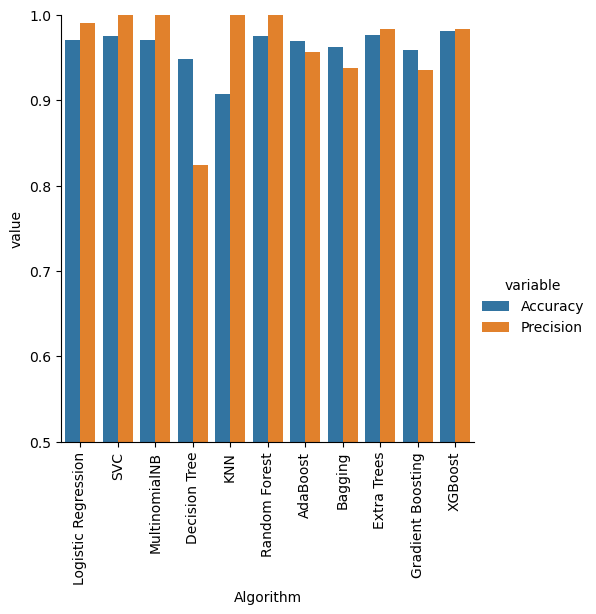

In [125]:
sns.catplot(x = 'Algorithm', y='value',
hue = 'variable', data=performance_df1, kind='bar', height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [126]:
min_len = min(len(clfs.keys()), len(accuracy_scores), len(precision_scores))

algorithms = list(clfs.keys())[:min_len]
accuracies = accuracy_scores[:min_len]
precisions = precision_scores[:min_len]

performance_df = pd.DataFrame({
    'Algorithm': algorithms,
    'Accuracy': accuracies,
    'Precision': precisions
})


In [127]:
temp_df = pd.DataFrame({
    'Algorithm': algorithms,
    'Accuracy_max_ft_3000': accuracies,
    'Precision_max_ft_3000': precisions
})

temp_df2 = pd.DataFrame({
    'Algorithm': algorithms,
    'Accuracy_scaling': accuracies,
    'Precision_scaling': precisions
})

new_df = performance_df.merge(temp_df, on='Algorithm')
new_df_scaled = new_df.merge(temp_df2, on='Algorithm')

print(new_df_scaled)


              Algorithm  Accuracy  Precision  Accuracy_max_ft_3000  \
0   Logistic Regression  0.970019   0.990826              0.970019   
1                   SVC  0.975822   1.000000              0.975822   
2         MultinomialNB  0.970019   1.000000              0.970019   
3         Decision Tree  0.948743   0.824427              0.948743   
4                   KNN  0.907157   1.000000              0.907157   
5         Random Forest  0.975822   1.000000              0.975822   
6              AdaBoost  0.969052   0.956897              0.969052   
7               Bagging  0.962282   0.938053              0.962282   
8           Extra Trees  0.976789   0.983051              0.976789   
9     Gradient Boosting  0.958414   0.935780              0.958414   
10              XGBoost  0.981625   0.983740              0.981625   

    Precision_max_ft_3000  Accuracy_scaling  Precision_scaling  
0                0.990826          0.970019           0.990826  
1                1.000000    

In [128]:
print("Number of algorithms:", len(clfs.keys()))
print("Number of accuracy scores:", len(accuracy_scores))
print("Number of precision scores:", len(precision_scores))


Number of algorithms: 11
Number of accuracy scores: 11
Number of precision scores: 11


In [129]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(penalty='l1', solver='liblinear', max_iter=1000)


In [130]:
valid_algorithms = []
valid_accuracy = []
valid_precision = []

for name, clf in clfs.items():
    try:
        acc, pre = train_classifier(clf, X_train, y_train, X_test, y_test)
        valid_algorithms.append(name)
        valid_accuracy.append(acc)
        valid_precision.append(pre)
    except Exception as e:
        print(f"⚠ Skipped {name} due to error: {e}")


C:\Users\HP\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [18:05:55] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [131]:
# Step 1: Create a new DataFrame
temp_df = pd.DataFrame({
    'Algorithm': list(clfs.keys()),
    'Accuracy_num_chars': accuracy_scores,
    'Precision_num_chars': precision_scores
})

temp_df = temp_df.sort_values('Precision_num_chars', ascending=False).reset_index(drop=True)


new_df_scaled = performance_df.merge(temp_df, on='Algorithm', how='inner')

print(new_df_scaled)


              Algorithm  Accuracy  Precision  Accuracy_num_chars  \
0   Logistic Regression  0.970019   0.990826            0.970019   
1                   SVC  0.975822   1.000000            0.975822   
2         MultinomialNB  0.970019   1.000000            0.970019   
3         Decision Tree  0.948743   0.824427            0.948743   
4                   KNN  0.907157   1.000000            0.907157   
5         Random Forest  0.975822   1.000000            0.975822   
6              AdaBoost  0.969052   0.956897            0.969052   
7               Bagging  0.962282   0.938053            0.962282   
8           Extra Trees  0.976789   0.983051            0.976789   
9     Gradient Boosting  0.958414   0.935780            0.958414   
10              XGBoost  0.981625   0.983740            0.981625   

    Precision_num_chars  
0              0.990826  
1              1.000000  
2              1.000000  
3              0.824427  
4              1.000000  
5              1.000000  
6

In [132]:
# Voting Classifier
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier

In [133]:
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc) ], voting='soft')

In [134]:
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [135]:
y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))


Accuracy 0.9816247582205029
Precision 1.0


In [136]:
estimators=[('svm', svc), ('nb', mnb), ('et', etc)]
final_estimator=RandomForestClassifier()

In [137]:
from sklearn.ensemble import StackingClassifier

clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9748549323017408
Precision 0.9242424242424242


In [139]:
import pickle

# Save TF-IDF vectorizer
pickle.dump(tfidf, open('Vectorizer.pkl', 'wb'))



In [140]:
pickle.dump(mnb, open('model.pkl', 'wb'))